## TD 3

### GRID et RANDOM SEARCH CV

In [ ]:
# pour situer le dossier depuis lequel s'execute votre code
import os 
os.getcwd()
# pour déplacer ce même dossier
# os.chdir(path = './project3000')

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Chargement des données
horses = pd.read_csv('data/horse_clean.csv')

# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    horses.drop('surgical_lesion_yes', axis=1),
    horses['surgical_lesion_yes'],
    test_size=0.2, random_state=42
    )

print('Xtrain :', X_train.shape[0])
print('Xtest :', X_test.shape[0])

Xtrain : 239
Xtest : 60


En utilisant la fonction `GridSearchCV` de `sklearn.model_selection`, déterminer les meilleurs hyperparamètres pour les algorithmes suivants :

DecisionTreeClassifier,
RandomForestClassifier,
GradientBoostingClassifier


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'max_depth': (2, 15, 30),
    'n_estimators': (100, 200, 300, 400, 500, 600, 1000),
}

gridSearch = GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameter_grid,
                cv=5,
                n_jobs=-1,
                verbose=1)

In [31]:
#visualisation des résultats
gridSearch.fit(X_train, y_train) #

print(gridSearch.best_score_) # Meilleur score
print(gridSearch.best_params_) # Meilleurs paramètres

Fitting 5 folds for each of 21 candidates, totalling 105 fits
0.7825354609929078
{'max_depth': 15, 'n_estimators': 1000}


In [32]:
cvResults = pd.DataFrame(gridSearch.cv_results_
             ).sort_values(by='rank_test_score'
                           ) # Résultats de la recherche
cvResults.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,3.343744,0.226543,0.099564,0.004680,15,1000,"{'max_depth': 15, 'n_estimators': 1000}",0.812500,0.687500,0.812500,0.791667,0.808511,0.782535,0.048136,1
19,1.923111,0.127992,0.059094,0.003489,30,600,"{'max_depth': 30, 'n_estimators': 600}",0.812500,0.687500,0.791667,0.770833,0.829787,0.778457,0.049597,2
20,2.903282,0.190982,0.061971,0.013263,30,1000,"{'max_depth': 30, 'n_estimators': 1000}",0.812500,0.687500,0.791667,0.770833,0.829787,0.778457,0.049597,2
11,1.813074,0.165596,0.063462,0.014584,15,500,"{'max_depth': 15, 'n_estimators': 500}",0.812500,0.687500,0.833333,0.729167,0.808511,0.774202,0.056010,4
9,1.059464,0.134478,0.038275,0.011165,15,300,"{'max_depth': 15, 'n_estimators': 300}",0.833333,0.687500,0.791667,0.770833,0.787234,0.774113,0.047958,5
18,1.676180,0.099601,0.053105,0.004405,30,500,"{'max_depth': 30, 'n_estimators': 500}",0.812500,0.708333,0.812500,0.770833,0.765957,0.774025,0.038344,6


<Axes: title={'center': 'Evolution du testScore pour max depth = 15'}, xlabel='param_n_estimators'>

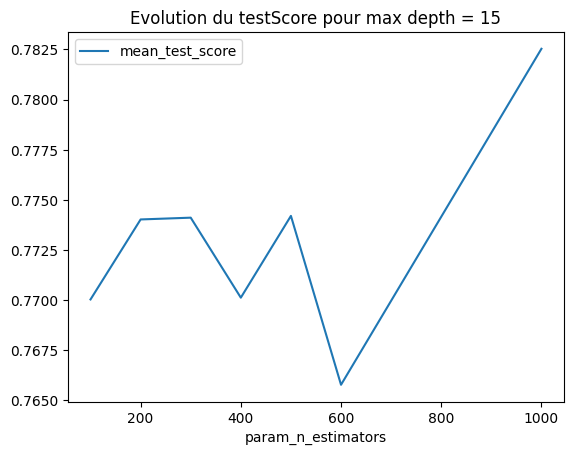

In [33]:
cvResults.query('param_max_depth == 15'
                ).sort_values(by='param_n_estimators'
                ).plot(x='param_n_estimators',
                        y='mean_test_score', 
                        kind='line',
                        title='Evolution du testScore pour max depth = 15')

### RandomizedSearchCV

Reprendre la question précédente en utilisant la fonction `RandomizedSearchCV` de `sklearn.model_selection`.

Comparer les résultats et le temps d'exécution des deux méthodes.

In [53]:
from sklearn.model_selection import RandomizedSearchCV

parameter_grid = {
    'max_depth': (1, 5, 15, 30),
    'min_samples_split': (2, 4, 8),
    'min_samples_leaf': (1,2,3,5),
    'max_features': (None, 'sqrt', 'log2'),
    'n_estimators': (200, 300, 500),
}

gridRandom = RandomizedSearchCV(estimator=RandomForestClassifier(),
                param_distributions=parameter_grid,
                n_iter=72,
                cv=5,
                n_jobs=-1,
                verbose=1)

In [54]:
#visualisation des résultats
gridRandom.fit(X_train, y_train) #

print(gridRandom.best_score_) # Meilleur score
print(gridRandom.best_params_) # Meilleurs paramètres

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.7911347517730497
{'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5}
RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=4,
                       n_estimators=500)
{'mean_fit_time': array([2.05676737, 3.00581741, 3.57726803, 2.25060883, 2.17444639,
       1.15558686, 1.20060291, 1.77311616, 1.02036967, 2.62432055,
       1.15729222, 1.22279119, 1.25638804, 0.90887704, 1.93578486,
       0.88248158, 0.96939626, 1.68295894, 1.92712278, 0.68778472,
       2.43667846, 0.78495345, 0.66396189, 1.01185751, 1.18545108,
       2.6329936 , 1.7437746 , 0.68036213, 1.00166745, 3.01740618,
       1.78249688, 1.33847175, 1.16724172, 2.93590546, 1.51045699,
       0.95521603, 2.55437074, 0.72223258, 1.71553726, 0.61625214,
       0.89523096, 1.81478558, 1.04721594, 1.00399861, 0.64071875,
       1.86188974, 0.83673825, 2.30283656, 0.96395454, 0.9112236 ,
   

Visualisez les diférents les scores obtenus pour les différents paramètres testés.

### Pipelines

In [ ]:
horses = pd.read_csv('data/horse.csv')

# suppression des colonnes avec trop de valeurs manquantes & inutiles

horses.drop(['surgery', 'hospital_number', 'outcome', 'lesion_1',
             'lesion_2', 'lesion_3', 'cp_data'],
               axis=1, inplace=True
               )


# suppression des lignes avec trop de valeurs manquantes
horses.dropna(thresh=0.6*len(horses), axis=1, inplace=True)

# encodage des variables catégorielles
horsesf = pd.get_dummies(horses, drop_first=True)

# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    horsesf.drop('surgical_lesion_yes', axis=1),
    horsesf['surgical_lesion_yes'],
    test_size=0.2, random_state=42)

A partir du dataframe, on va créer un pipeline qui va permettre de faire les transformations suivantes :
- Remplacer les valeurs manquantes à l'aide d'un [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
- Entrainer un [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Assemblez une pipeline à l'aide des fonctions çi-dessous.

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [86]:
# On crée notre pipeline
pipe = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('model', DecisionTreeClassifier())
])

On importe notre fichier initial, et on créee nos échantillons d'entrainement et de test

Entrainons notre pipeline sur l'échantillon d'entrainement

In [88]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('model', DecisionTreeClassifier())])

Prédire les valeurs de l'échantillon de test, et calculer la précision de notre modèle.

In [89]:
pipe.score(X_test, y_test)

0.6333333333333333

#### Pipeline avec GridSearchCV

On va maintenant utiliser un GridSearchCV pour trouver les meilleurs paramètres pour notre modèle.

On va utiliser les paramètres suivants :
Pour le SimpleImputer :
- strategy : ['mean', 'median', 'most_frequent']

Pour le DecisionTreeClassifier :
- max_depth : [3, 10, 20,  30]

In [90]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'imputer__strategy': ('mean', 'median', 'most_frequent'),
    'model__max_depth': (3, 10, 20, 30),
}

gridSearch = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
    )

gridSearch.fit(X_train, y_train)

print(gridSearch.best_score_) # Meilleur score
print(gridSearch.best_params_) # Meilleurs paramètres

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.7073581560283688
{'imputer__strategy': 'most_frequent', 'model__max_depth': 3}


### Encore plus de pipelines

On va maintenant essayer de créer une pipeline pour la totalité des transformations que l'on a faites jusqu'à présent sur nos données.

On va donc créer une pipeline qui va :
- Retirer les colonnes inutiles
- (optionel) Retirer les colonnes avec trop de valeurs manquantes
- Imputer les valeurs manquantes
- Transformer les variables catégorielles en variables numériques
    - Avec une regle pour les variables nominales
    - Avec une regle pour les variables ordinales
- Entrainer un DecisionTreeClassifier


In [50]:
import pandas as pd

# Pour faciliter la suite, on peut préciser le type de chaque colonne
horses = pd.read_csv('data/horse.csv',
            dtype= {'surgery': 'category',
                'age': 'category',
                'hospital_number': 'int64',
                'rectal_temp': 'float64',
                'pulse': 'float64',
                'respiratory_rate': 'float64',
                'temp_of_extremities': 'category',
                'peripheral_pulse': 'category',
                'mucous_membrane': 'category',
                'capillary_refill_time': 'category',
                'pain': 'category',
                'peristalsis': 'category',
                'abdominal_distention': 'category',
                'nasogastric_tube': 'category',
                'nasogastric_reflux': 'category',
                'nasogastric_reflux_ph': 'float64',
                'rectal_exam_feces': 'category',
                'abdomen': 'category',
                'packed_cell_volume': 'float64',
                'total_protein': 'float64',
                'abdomo_appearance': 'category',
                'abdomo_protein': 'float64',
                'outcome': 'category',
                'surgical_lesion': 'category',
                'lesion_1': 'category',
                'lesion_2': 'category',
                'lesion_3': 'category',
                'cp_data': 'category'
                }
            )

# echantillons
from sklearn.model_selection import train_test_split

# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    horses.drop('surgical_lesion', axis=1),
    horses['surgical_lesion'],
    test_size=0.3,
    random_state=42
    )
print(X_train.shape)
print(X_test.shape)
y_train = pd.Series([1 if x == 'yes' else 0 for x in y_train])
y_test = pd.Series([1 if x == 'yes' else 0 for x in y_test])

(209, 27)
(90, 27)


In [64]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

class DropColumns(TransformerMixin, BaseEstimator):
    def __init__(self, columnsToDrop=[]) -> None:
        self.columnsToDrop = columnsToDrop

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.drop(self.columnsToDrop, axis=1)
    
class DropNa(TransformerMixin):
    def __init__(self, threshold=0.6) -> None:
        self.threshold = threshold

    def fit(self, X, y=None):
        self.columns_to_drop = X.columns[X.isna().mean() > self.threshold]
        return self
    
    def transform(self, X, y=None):
        return X.drop(self.columns_to_drop, axis=1)

class Imputer_perso(TransformerMixin):
    def __init__(self) -> None:
        return None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.copy()
        for col in X.columns:
            if X[col].dtype in ['float64', 'int64']:
                # Remplacement des valeurs manquantes par la moyenne pour les variables numériques
                X[col] = X.loc[:,col].fillna(X[col].mean())
            else:
                # Remplacement des valeurs manquantes par le mode pour les variables catégorielles mode = valeur la plus fréquente
                X[col] = X.loc[:,col].fillna(X[col].mode()[0])
        return X
  
class EncodeOrdinal(TransformerMixin):
    def __init__(self, columnsToEncode : list, categories : list) -> None:
        self.columnsToEncode = columnsToEncode
        self.categories = categories

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # On crée une copie de X pour ne pas modifier le DataFrame original
        df = X.copy()
        dfToEncode = df[self.columnsToEncode]
        df.drop(self.columnsToEncode, axis=1, inplace=True)
        # On encode chaque colonne catégorielle avec un encodeur ordinal
        encoder = OrdinalEncoder(categories=self.categories)
        dfEncoded = encoder.fit_transform(dfToEncode)
        # On recrée un DataFrame avec les colonnes encodées
        dfEncoded = pd.DataFrame(dfEncoded, columns=self.columnsToEncode)
        # On retourne le DataFrame avec les colonnes encodées concaténé avec les colonnes ignorées
        return df.join(dfEncoded)
    
class EncodeOneHot(TransformerMixin):
    def __init__(self, columnsToEncode : str | list  = 'cat') -> None:
        self.columnsToEncode = columnsToEncode

    def fit(self, X, y=None):
        # si columnsToEncode est 'cat' on encode toutes les colonnes catégorielles
        if type(self.columnsToEncode) == str:
            if self.columnsToEncode == 'cat':
                self.columnsToEncode = X.select_dtypes(include='category').columns
            else:
                exception = f"columnsToEncode must be a list or 'cat', not {type(self.columnsToEncode)}"
                raise Exception(exception)
        return self
    
    def transform(self, X, y=None):
        # On crée une copie de X pour ne pas modifier le DataFrame original
        df = X.copy()
        dfToEncode = df[self.columnsToEncode]
        df.drop(self.columnsToEncode, axis=1, inplace=True)
        # On encode nos colonnes catégorielles avec un encodeur one-hot
        # sparse=False pour avoir un tableau NumPy et non une matrice creuse
        # set_output pour avoir un DataFrame en sortie
        OnehotEncoder = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
        dfToEncode = OnehotEncoder.fit_transform(dfToEncode)
        # On retourne le DataFrame avec les colonnes encodées concaténé avec les colonnes ignorées
        return df.join(dfToEncode)

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

columns_to_drop = ['surgery', 'hospital_number', 'outcome',
                   'lesion_1','lesion_2', 'lesion_3', 'cp_data']

tresh = 0.6

ordinalColumns = ['temp_of_extremities', 'pain']
categories = [['cold', 'cool', 'normal', 'warm'],
              ['alert', 'depressed', 'mild_pain', 'severe_pain', 'extreme_pain']]

pipeline = Pipeline([
    ('drop_columns', DropColumns(columnsToDrop = columns_to_drop)),
    ('dropNa', DropNa(threshold=tresh)),
    ('imputer', Imputer_perso()),
    ('encoderOrdinal', EncodeOrdinal(columnsToEncode=ordinalColumns, categories=categories)),
    ('encoderOneHot', EncodeOneHot(columnsToEncode='cat')),
    ('model', DecisionTreeClassifier())
])

In [66]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('drop_columns',
                 DropColumns(columnsToDrop=['surgery', 'hospital_number',
                                            'outcome', 'lesion_1', 'lesion_2',
                                            'lesion_3', 'cp_data'])),
                ('dropNa', <__main__.DropNa object at 0x0000018E92DD1790>),
                ('imputer',
                 <__main__.Imputer_perso object at 0x0000018E92DDE630>),
                ('encoderOrdinal',
                 <__main__.EncodeOrdinal object at 0x0000018E92DDF5F0>),
                ('encoderOneHot',
                 <__main__.EncodeOneHot object at 0x0000018E92DDCFE0>),
                ('model', DecisionTreeClassifier())])

In [54]:
pipeline.score(X_test, y_test)

0.6222222222222222

avec des ColumnTransformer

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

columns_to_drop = ['surgery', 'hospital_number', 'outcome',
                     'lesion_1','lesion_2', 'lesion_3', 'cp_data']

tresh = 0.6

ordinalColumns = ['temp_of_extremities', 'pain']

nominalColumns = list(set(X_train.select_dtypes(
    include='category')) - set(ordinalColumns) - set(columns_to_drop))

categories = [['cold', 'cool', 'normal', 'warm'],
                ['alert', 'depressed', 'mild_pain', 'severe_pain', 'extreme_pain']]

pretraitement = Pipeline([
    ('drop_columns', DropColumns(columnsToDrop = columns_to_drop)),
    ('imputer', Imputer_perso())
])

encodage = ColumnTransformer([
    ('encoderOrdinal', 
        OrdinalEncoder(categories=categories),
        ordinalColumns),
    ('encoderOneHot', 
        OneHotEncoder(drop='first', sparse_output=False),
        nominalColumns)
], force_int_remainder_cols=False
) 

pipeline = Pipeline([
    ('pretraitement', pretraitement),
    ('Encodage', encodage),
    ('model', DecisionTreeClassifier())
])

In [61]:
pipeline

Pipeline(steps=[('pretraitement',
                 Pipeline(steps=[('drop_columns',
                                  <__main__.DropColumns object at 0x0000018E906BB500>),
                                 ('imputer',
                                  <__main__.Imputer_perso object at 0x0000018E90551340>)])),
                ('Encodage',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   transformers=[('encoderOrdinal',
                                                  OrdinalEncoder(categories=[['cold',
                                                                              'cool',
                                                                              'normal',
                                                                              'warm'],
                                                                             ['alert',
                                                                              'depress...
                                                                              'extreme_pain']]),
                                                  ['temp_of_extremities',
                                                   'pain']),
                                                 ('encoderOneHot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['peristalsis',
                                                   'abdomo_appearance',
                                                   'abdomen',
                                                   'abdominal_distention',
                                                   'capillary_refill_time',
                                                   'rectal_exam_feces',
                                                   'nasogastric_tube',
                                                   'peripheral_pulse',
                                                   'mucous_membrane',
                                                   'nasogastric_reflux',
                                                   'age'])])),
                ('model', DecisionTreeClassifier())])

In [62]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pretraitement',
                 Pipeline(steps=[('drop_columns',
                                  <__main__.DropColumns object at 0x0000018E906BB500>),
                                 ('imputer',
                                  <__main__.Imputer_perso object at 0x0000018E90551340>)])),
                ('Encodage',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   transformers=[('encoderOrdinal',
                                                  OrdinalEncoder(categories=[['cold',
                                                                              'cool',
                                                                              'normal',
                                                                              'warm'],
                                                                             ['alert',
                                                                              'depress...
                                                                              'extreme_pain']]),
                                                  ['temp_of_extremities',
                                                   'pain']),
                                                 ('encoderOneHot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['peristalsis',
                                                   'abdomo_appearance',
                                                   'abdomen',
                                                   'abdominal_distention',
                                                   'capillary_refill_time',
                                                   'rectal_exam_feces',
                                                   'nasogastric_tube',
                                                   'peripheral_pulse',
                                                   'mucous_membrane',
                                                   'nasogastric_reflux',
                                                   'age'])])),
                ('model', DecisionTreeClassifier())])

In [63]:
pipeline.score(X_test, y_test)

0.6222222222222222